Just Python

A simple neuron: 3 inputs and single output

In [1]:
import random
random.seed(42)

In [2]:
inputs=[1,2,3]
weights=[0.1, 0.5,-0.3]
bias= 0.45
output= sum(inputs[i]*weights[i] for i in range(len(inputs)))+bias
output

0.6500000000000001

Multiple outputs: 3 inputs and 3 outputs

In [3]:
# The three inputs
inputs= [2,3,1]
weight_size=(3,3) # nth row has weight values for the nth output neuron

weights= [[random.gauss(0,1) for _ in range(weight_size[1])] for _ in range(weight_size[0])]


 
bias_size=3 # each output neuron has a bias, so 3 biases
biases=[ random.gauss(0,1) for _ in range(bias_size)]
print('weights:', weights)
print('biases:', biases)



weights: [[-0.14409032957792836, -0.1729036003315193, -0.11131586156766246], [0.7019837250988631, -0.12758828378288709, -1.4973534143409575], [0.33231834406771527, -0.2673374784971682, -0.216958684145195]]
biases: [0.11588478670085507, 0.23229773690672087, 1.163558686599143]


In [4]:
output=[]
for nth_w, nth_b in zip(weights,biases):
    nth_output=0
    for w, nth_input in zip(nth_w,inputs):
        nth_output+=w*nth_input
    nth_output+=nth_b
    output.append(nth_output)
    print('nth_output:',nth_output)

print('outputs:',output)


nth_output: -0.8023225350172221
nth_output: -0.24385307858517166
nth_output: 0.8092242550978739
outputs: [-0.8023225350172221, -0.24385307858517166, 0.8092242550978739]


With Numpy

Simple neuron: 3 inputs and 1 output

In [5]:
import numpy as np

In [6]:
inputs=[1,2,3]
weights=[0.1, 0.5,-0.3]
bias= 0.45
output=np.dot(weights,inputs)+bias
print(output)

0.6500000000000001


3 inputs and 3 outputs case

In [7]:
# The three inputs
inputs= np.array([2,3,1])
weight_size=(3,3) # nth row has weight values for the nth output neuron
random.seed(42)
weights= [[random.gauss(0,1) for _ in range(weight_size[1])] for _ in range(weight_size[0])]


 
bias_size=3 # each output neuron has a bias, so 3 biases
biases=[ random.gauss(0,1) for _ in range(bias_size)]
biases=np.array(biases)
print('weights:', weights)
print('biases:', biases)
# biases.shape
## matrix operations: (3*3) x (3*1)+ (3*1)= 3*1
outputs= np.dot(weights,inputs)+biases
print('outputs:',outputs)


weights: [[-0.14409032957792836, -0.1729036003315193, -0.11131586156766246], [0.7019837250988631, -0.12758828378288709, -1.4973534143409575], [0.33231834406771527, -0.2673374784971682, -0.216958684145195]]
biases: [0.11588479 0.23229774 1.16355869]
outputs: [-0.80232254 -0.24385308  0.80922426]


How about 3 batches of 4 inputs to produce 3 outputs

In [8]:
input_size= (3,4) # 3 batches of 4 input neurons
inputs=np.random.normal(loc=0.0, scale=1.0,size=input_size)


weight_size= (3,4) # 4 weights corresponding to 4 neurons and 3 rows corresponding to 3 batches of inputs
weights= np.random.normal(loc=0.0, scale=1.0,size=weight_size)

bias_size=(3,3) # 3 biases for 3 output neurons
biases=np.random.normal(loc=0.0,scale=1.0,size=bias_size)
inputs

array([[-1.13747511,  0.77764732, -0.55585023, -0.70744719],
       [-0.40006264, -0.91174302,  1.50459074, -1.02425426],
       [-0.62633538,  0.46981132, -1.83588204,  0.74707536]])

In [9]:
np.array(inputs).shape
type(np.array(inputs))

numpy.ndarray

In [10]:
#Each output is multiplication of each row of inputs with that of weights: this can be done by transposing weights to (4,3) shape so that: (3*4) x (4*3)=(3*3)

outputs=np.dot(inputs,np.array(weights).T)+biases
outputs


array([[ 1.38913256, -2.32227993,  2.54536752],
       [ 2.93145838,  0.66136061, -0.43088138],
       [-2.16565557, -2.22027053,  0.14259002]])

In [ ]:
# each row of the 'outputs' represent output of the 3 neurons for a given batch ( 3 batches --> 3 rows)

Adding Hidden Layer

In [11]:
# what if we add a hidden layer? we can consider the previous output as a hidden layer and add another layer to be a final output layer
inputs= outputs # the output of the previous layer is the input of the next layer
np.random.seed(0)
biases2= np.random.normal(size=(3,1))
weights2=np.random.normal(size=(3,3))
last_output= np.dot(inputs, weights2.T)+ biases2
# 
last_output


array([[-1.94757377,  3.17261499,  5.70157915],
       [ 8.62546248,  3.12967524,  1.072455  ],
       [-8.1600989 , -0.75749032, -0.02292776]])

Generalization for n layers with python class

In [12]:
class DenseLayer():
    # Let's initialize the layers with random weights and biases
    def __init__(self,inputs_size, outputs_size):
        self.weights=np.random.normal(loc=0.0,scale=1.0,size=(inputs_size,outputs_size))
        self.bias=np.zeros(outputs_size)
    # Forward pass: computation at each layer
    def forward(self,inputs):
        self.output= np.dot(inputs,self.weights) + self.bias
        



Generate Spiral Data

In [62]:
%pip install nnfs

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


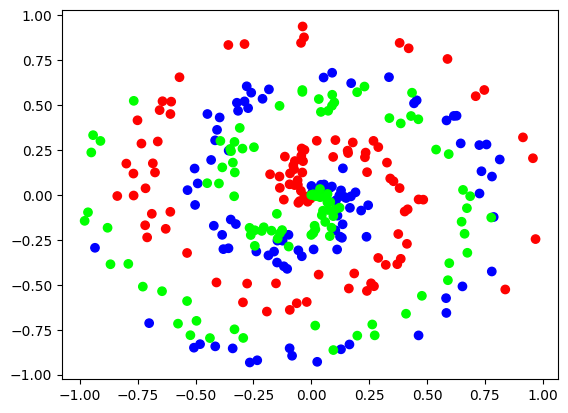

In [13]:
from nnfs.datasets import spiral_data
import numpy as np
import matplotlib.pyplot as plt
import nnfs
nnfs.init()

X,y=spiral_data(100,3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='brg')
plt.show()


In [14]:
# let's make a  layer with 2 inputs and 3 neurons ( outputs)
layer1=DenseLayer(2,3)
layer1.forward(X)
layer1.output[:3]

array([[ 0.        ,  0.        ,  0.        ],
       [-0.01047519,  0.01139536, -0.00479835],
       [-0.02741484,  0.03172915, -0.00869218]], dtype=float32)

More Numpy and Broadcasting

In [15]:
ls=[[1,2,3],[4,5,6],[7,8,9]]
array=np.array(ls)
print(array)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [16]:
# total summation
print(np.sum(array,axis=None))

45


In [ ]:

# row-wise |vertical summation ( summing all rows of a column)
sum_rows=np.sum(array,axis=0)
print('sum_rows:',sum_rows)
print(sum_rows.shape) # (3,) is 1d array


sum_rows: [12 15 18]
(3,)


In [17]:
# column-wise | horizontal summation( all columns of a given row)
col_sum = np.sum(array,axis=1)
print('column sum:',col_sum)
print(col_sum.shape) # (3,1) is 1D array

column sum: [ 6 15 24]
(3,)


In [18]:
# if we wanna maintain the 2D shape of the input, we add the below argument

col_2dsum=np.sum(array,axis=0,keepdims=True)
print('col_2dsum:',col_2dsum)
print(col_2dsum.shape)

col_2dsum: [[12 15 18]]
(1, 3)


In [19]:
row_2dsum=np.sum(array,axis=1,keepdims=True)
print('row_2dsum:',row_2dsum)
print(row_2dsum.shape)

row_2dsum: [[ 6]
 [15]
 [24]]
(3, 1)


In [20]:
a=np.array([1,2,3])
a.shape

(3,)

In [95]:
b=np.array([ [1],[2],[3] ])
b.shape

(3, 1)

Nonlinearities

In [ ]:
#ReLu
class ReLu():
    def __init__(self):
        pass
    def forward(self,x):
        return np.maximum(0,x)
        

In [22]:
x=5
rl=ReLu()
rl.forward(x)

np.int64(5)

In [23]:
# SoftMax
class softmax():
    def __init__(self):
        pass
    def forward(self,x):
        print('input:',x)
        values=np.exp( x-np.max(x,axis=1,keepdims=True) )
        print('exponentials:',values)
        probabilities=values/np.sum(values,axis=1,keepdims=True)
        print('probabilities:',probabilities)
        print('sum probs:',np.sum(probabilities,axis=1))
        return probabilities
        

In [ ]:
x=np.array( [[1,2,3],[4,5,6],[7,8,9]])
# each row is inputs from a given batch: n rows --> n batches
sm=softmax()
sm.forward(x)


input: [[1 2 3]
 [4 5 6]
 [7 8 9]]
exponentials: [[0.13533528 0.36787944 1.        ]
 [0.13533528 0.36787944 1.        ]
 [0.13533528 0.36787944 1.        ]]
probabilities: [[0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]]
sum probs: [1. 1. 1.]


array([[0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096]])

Using the layer with activation functions

In [ ]:
X,y=spiral_data(100,3)
layer1=DenseLayer(2,3)
layer2=DenseLayer(3,3)
relu=ReLu()
sfm=softmax()
linear_sum=layer1.forward(X)
reluied_sum=relu.forward(linear_sum)
next_lin_sum=layer2.forward(reluied_sum)
softmaxed_sum=sfm.forward(next_lin_sum)

10
9
8
7
6
5
4
3
2
1
0
